In [1]:
using CSV
using DataFrames
using Gadfly

In [2]:
ENV["COLUMNS"] = 1000;

In [3]:
data = DataFrame(CSV.File("../rawdata/reported_hospital_capacity_admissions_facility_level_weekly_average_timeseries_20210214.csv", missingstrings=["-999999", ""]))

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,is_metro_micro,total_beds_7_day_avg,all_adult_hospital_beds_7_day_avg,all_adult_hospital_inpatient_beds_7_day_avg,inpatient_beds_used_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg,inpatient_beds_7_day_avg,total_icu_beds_7_day_avg,total_staffed_adult_icu_beds_7_day_avg,icu_beds_used_7_day_avg,staffed_adult_icu_bed_occupancy_7_day_avg,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg,staffed_icu_adult_patients_confirmed_covid_7_day_avg
,String,Date…,String,String?,String,String?,String?,Int64?,String,Int64?,Bool,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,df2363988746840134806aa7b2accf9c89259601776986d49f0c579f6d84532e,2021-02-05,PR,missing,Hospital San Antonio,"#18 Norte, Calle Dr",Mayagüez,680,Short Term,missing,0,75.0,36.0,36.0,15.3,9.7,-999999.0,-999999.0,-999999.0,0.0,56.6,11.7,4.0,-999999.0,-999999.0,0.0,0.0
2,36db6bad3679dfdcccc301fc608438109ad907943c702fb3d57dc50cb7b5ba0b,2021-02-05,PR,missing,CDT Susana Centeno,missing,missing,765,Short Term,missing,0,7.0,5.0,5.0,-999999.0,-999999.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3b081d5ef1c552538e4af4aa593a857bb922a4f364a412e69f912f826ae12879,2021-02-05,LA,missing,Surgery Center of Zachary,missing,missing,70791,Short Term,missing,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,976b4ce7c95e1cd394112ce7762ed040f18a141e56a52ef9d3e5775ed9e98e1e,2021-02-05,PR,missing,Hospital Industrial C.F.S.E,Paseo Dr. Jose Celso Barbosa,San Juan,935,Short Term,missing,0,271.0,44.6,44.6,12.4,12.4,0.0,0.0,0.0,0.0,48.4,5.0,5.0,0.0,0.0,0.0,0.0
5,f70d7abf93c78280583ac18e896e6737cca8212b017513ffdcf3f4de52d49be4,2021-02-05,NV,missing,Elite Medical Center,150 E Harmon Ave,Las Vegas,89109,Short Term,missing,0,37.0,37.0,5.0,-999999.0,-999999.0,-999999.0,-999999.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ee04edd185865c38c839812cb2eb5ae5d3f8922e3b629ee98c7d9424a37826c4,2021-02-05,LA,missing,Alexandria Emergency Hospital,5900 Coliseum Blvd,Alexandria,71303,Short Term,missing,0,14.0,12.0,12.0,-999999.0,-999999.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
7,452193,2021-02-05,TX,452193,El Paso LTAC Hospital,missing,missing,79902,Long Term,missing,0,31.1,31.1,31.1,17.4,17.4,8.3,8.3,0.0,0.0,31.1,0.0,0.0,0.0,0.0,0.0,0.0
8,9922a3f069ff4686fe467885206fb1172f609233cfe517f5de214545d2458253,2021-02-05,PR,missing,Centro Medico Correccional de Bayamon,missing,missing,960,Short Term,missing,0,96.0,88.3,88.3,50.1,50.1,-999999.0,-999999.0,-999999.0,0.0,88.3,0.0,0.0,0.0,0.0,0.0,0.0
9,ff9032c172057190bf52f523d253c79af2d5f74d007084e83bb0995c637403d1,2021-02-05,PR,missing,HealthproMed,missing,missing,775,Short Term,missing,0,6.0,4.0,4.0,-999999.0,-999999.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
for n in names(data)
    println(n)
end

hospital_pk
collection_week
state
ccn
hospital_name
address
city
zip
hospital_subtype
fips_code
is_metro_micro
total_beds_7_day_avg
all_adult_hospital_beds_7_day_avg
all_adult_hospital_inpatient_beds_7_day_avg
inpatient_beds_used_7_day_avg
all_adult_hospital_inpatient_bed_occupied_7_day_avg
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg
total_adult_patients_hospitalized_confirmed_covid_7_day_avg
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg
total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg
inpatient_beds_7_day_avg
total_icu_beds_7_day_avg
total_staffed_adult_icu_beds_7_day_avg
icu_beds_used_7_day_avg
staffed_adult_icu_bed_occupancy_7_day_avg
staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg
staffed_icu_adult_patients_confirmed_covid_7_day_avg
total_patients_hospitalized_confirmed_influenza_7_day_avg
icu_patients_confirmed_influenza_7_day_avg
total_patients_hospitalized_confirmed_influenza_and_covi

In [5]:
state_counts = combine(groupby(data, :state), :hospital_name => (x -> length(unique(x))) => :n_hospitals)
sort!(state_counts, :state)

,state,n_hospitals
,String,Int64
1,AK,16
2,AL,96
3,AR,85
4,AZ,75
5,CA,352
6,CO,86
7,CT,30
8,DC,10
9,DE,7


In [6]:
county_counts = combine(groupby(data, :fips_code), :hospital_name => (x -> length(unique(x))) => :n_hospitals)
sort!(county_counts, :fips_code)

,fips_code,n_hospitals
,Int64?,Int64
1,1001,1
2,1003,3
3,1005,1
4,1007,1
5,1009,1
6,1011,1
7,1013,1
8,1015,3
9,1017,1


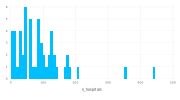

In [7]:
plot(
    state_counts,
    x = :n_hospitals,
    Geom.histogram,
) |> SVG(18cm, 10cm)

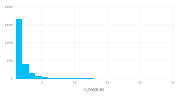

In [8]:
plot(
    county_counts,
    x = :n_hospitals,
    Geom.histogram,
    Coord.cartesian(xmax=25),
) |> SVG(18cm, 10cm)

In [9]:
data_total = combine(groupby(data, :collection_week), [
    :previous_day_admission_adult_covid_suspected_7_day_sum => x -> sum(skipmissing(x)),     
    :previous_day_admission_adult_covid_confirmed_7_day_sum => x -> sum(skipmissing(x)),
    :total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum => x -> sum(skipmissing(x)),
]);

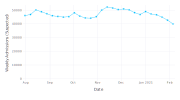

In [10]:
plot(
    data_total,
    x = :collection_week,
    y = :previous_day_admission_adult_covid_suspected_7_day_sum_function,
    Geom.point, Geom.line,
    Guide.xlabel("Date"),
    Guide.ylabel("Weekly Admissions (Suspected)"),
    Coord.cartesian(ymin=0),
    Scale.y_continuous(format=:plain),
) |> SVG(18cm, 10cm)

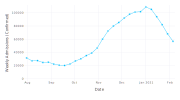

In [11]:
plot(
    data_total,
    x = :collection_week,
    y = :previous_day_admission_adult_covid_confirmed_7_day_sum_function,
    Geom.point, Geom.line,
    Guide.xlabel("Date"),
    Guide.ylabel("Weekly Admissions (Confirmed)"),
    Coord.cartesian(ymin=0),
    Scale.y_continuous(format=:plain),
    Guide.yticks(ticks=0:20_000:100_000),
) |> SVG(18cm, 10cm)

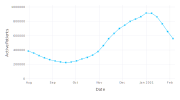

In [12]:
plot(
    data_total,
    x = :collection_week,
    y = :total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum_function,
    Geom.point, Geom.line,
    Guide.xlabel("Date"),
    Guide.ylabel("Active Patients"),
    Coord.cartesian(ymin=0),
    Scale.y_continuous(format=:plain),
    Guide.yticks(ticks=0:200_000:1_000_000),
) |> SVG(18cm, 10cm)